In [2]:
import sys, os

relative_path = os.path.join("..")
print(f"Relative path: {relative_path}")
sys.path.append(os.path.abspath(relative_path))
valid_paths = [p for p in sys.path if os.path.exists(p)]
print(f"Valid paths: {valid_paths}")

import pandas as pd
epochs = 5
batch_size = 16
folder = "1.6M"
sample_size = 32000
decay = 1.0
T = 1
Tm = 2
steps = 48
df_swaption = pd.read_csv(f"../data/export/test/swaption_1_normalize_True_test_results_sigma_0.01_dim_1_{T}_{Tm}_{sample_size}_{steps * T}_epochs_{epochs}_bs_{batch_size}_decay_{decay}.csv")

Relative path: ..
Valid paths: ['/home/borja/miniconda3/lib/python3.11', '/home/borja/miniconda3/lib/python3.11/lib-dynload', '/home/borja/LGM-BFSDE/.venv/lib/python3.11/site-packages', '/home/borja/LGM-BFSDE', '/home/borja/LGM-BFSDE']


In [3]:
df_swaption_filtered = df_swaption# .loc[df_swaption.V > 0.0]

2024-09-03 10:16:07.259343: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-03 10:16:07.776116: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-09-03 10:16:08.667879: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-09-03 10:16:08.668323: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA n

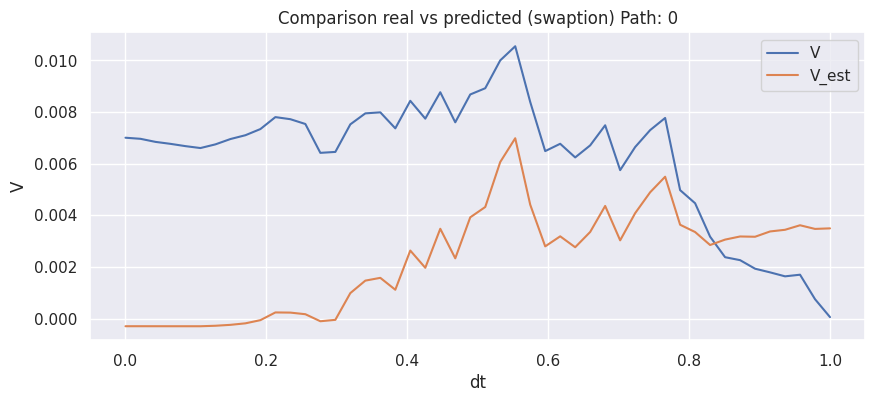

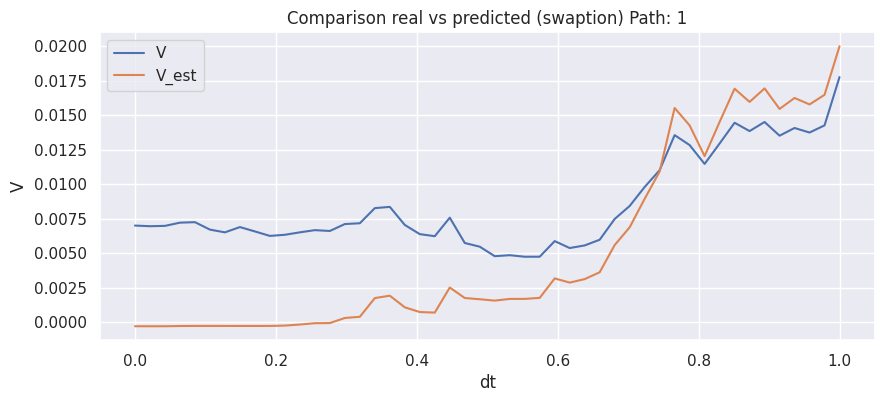

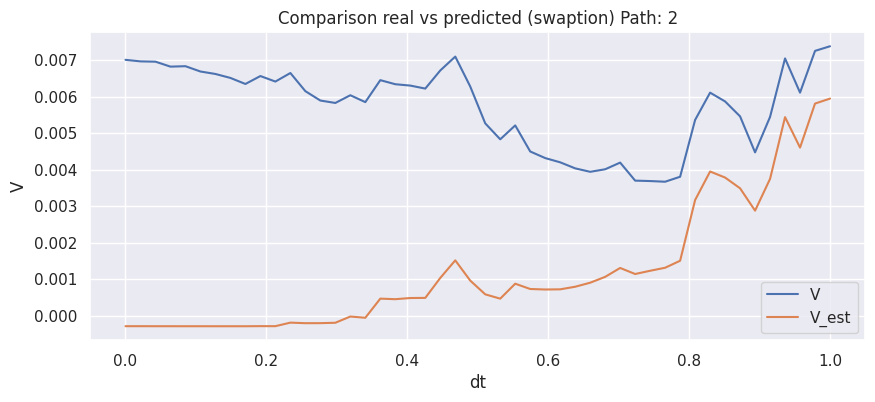

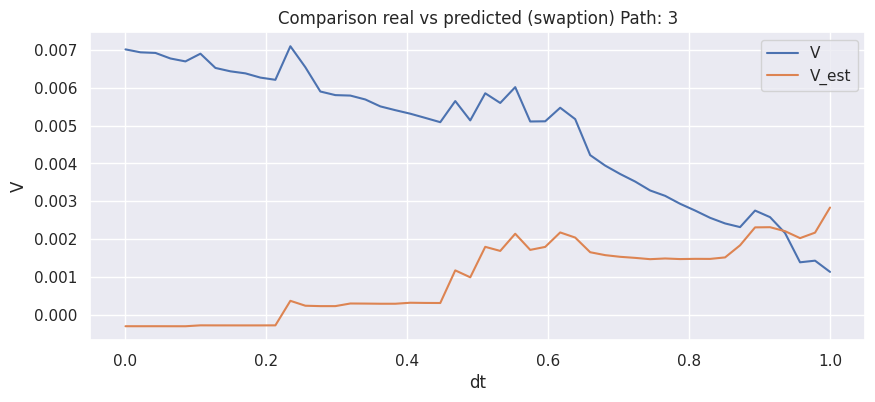

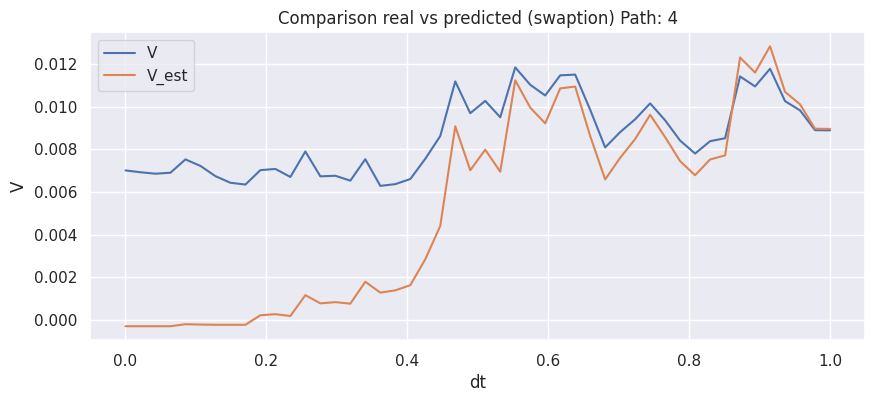

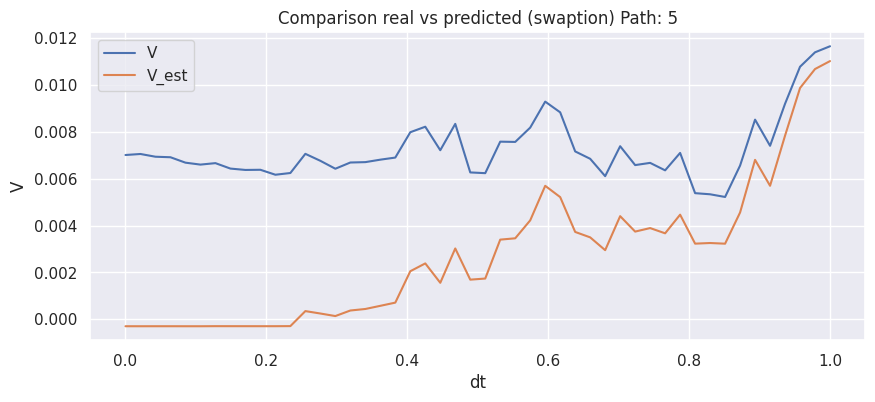

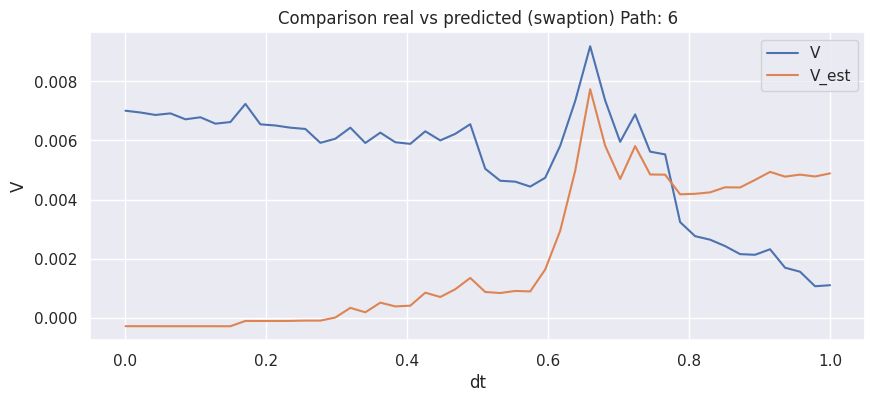

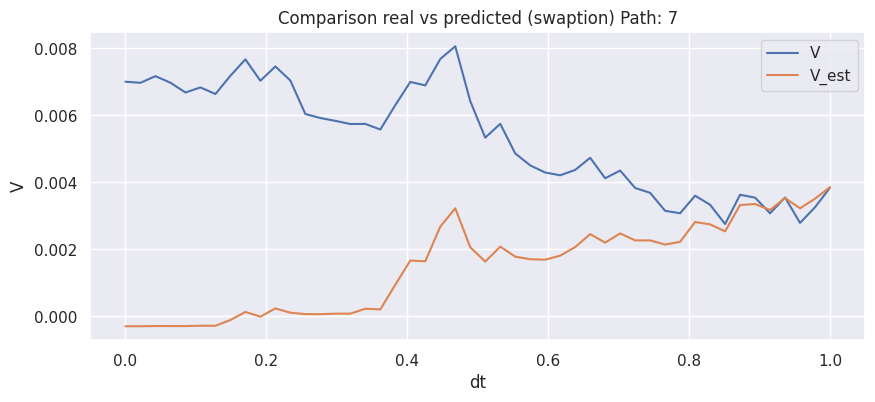

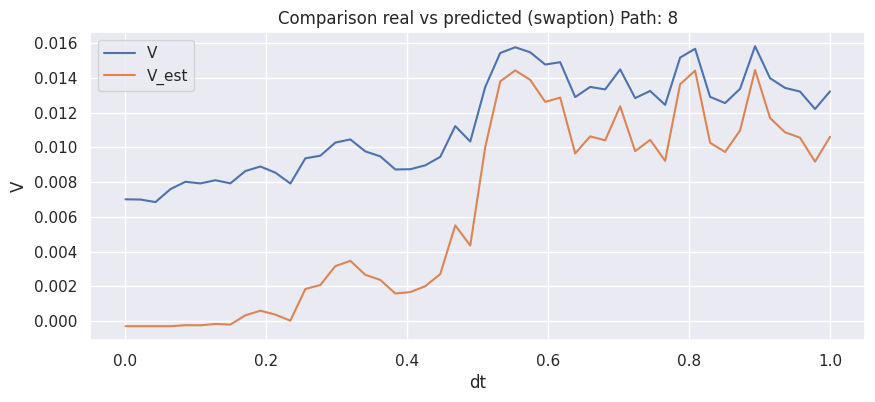

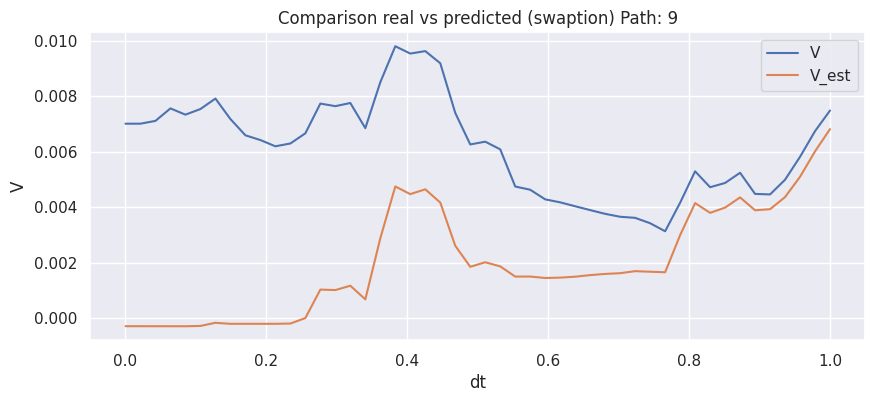

In [4]:
from scripts.utils.utils.utils import (
    VisualizationHelper
)
for i in range(10):
    VisualizationHelper.plot_multiple_series(
        df = df_swaption_filtered.loc[df_swaption_filtered.sim==i],
        x = "dt",
        values_column = ["V", "V_est"],
        title = f"Comparison real vs predicted (swaption) Path: {i}",
        xlabel = "dt",
        ylabel = "V"
    )